In [1]:
#import pandas
import pandas as pd

#import x and y data
x_data = pd.read_csv(r'C:\Users\nflfa\Desktop\Git\ControlProject\RawData\RawData.csv')
y_data = pd.read_csv(r'C:\Users\nflfa\Desktop\Git\ControlProject\RawData\RawData_Label.csv')

print(x_data)
print(y_data)

      Index    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0         1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1         2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2         3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3         4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4         5  0.270939  3636.329271  4460.409756  9.277992  32.424754   
...     ...       ...          ...          ...       ...        ...   
1990   1991 -0.001158  3744.190299  4863.374473  8.792891  24.901362   
1991   1992 -0.001147  3798.451896  4864.787808  8.814539  24.783557   
1992   1993 -0.000370  3774.038558  4891.309364  8.659021  24.805757   
1993   1994 -0.000925  3812.197101  4909.631048  8.724842  24.877275   
1994   1995 -0.000317  3761.939300  4935.966769  8.746042  24.470426   

         XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...        XMV3  \
0     47.559754  2798.975799  64.995825  122.898796  ...   26.6

In [2]:
#filling empty values with the attribute mean
x_data = x_data.fillna(x_data.mean())
y_data = y_data.fillna(y_data.mean())

print(x_data)
print(y_data)

      Index    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0         1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1         2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2         3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3         4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4         5  0.270939  3636.329271  4460.409756  9.277992  32.424754   
...     ...       ...          ...          ...       ...        ...   
1990   1991 -0.001158  3744.190299  4863.374473  8.792891  24.901362   
1991   1992 -0.001147  3798.451896  4864.787808  8.814539  24.783557   
1992   1993 -0.000370  3774.038558  4891.309364  8.659021  24.805757   
1993   1994 -0.000925  3812.197101  4909.631048  8.724842  24.877275   
1994   1995 -0.000317  3761.939300  4935.966769  8.746042  24.470426   

         XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...        XMV3  \
0     47.559754  2798.975799  64.995825  122.898796  ...   26.6

In [3]:
#set final x and y values
x = x_data.drop(columns = "Index")
y = y_data['label']

print(x)
print(y)

        XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5     XMEAS6  \
0     0.271033  3649.739415  4451.320791  9.223142  32.392900  47.559754   
1     0.270826  3653.341885  4488.640140  9.211980  32.501953  47.374855   
2     0.270474  3688.113265  4432.832766  9.235690  32.402838  47.817088   
3     0.272127  3651.680041  4459.268940  9.192009  31.876790  47.869249   
4     0.270939  3636.329271  4460.409756  9.277992  32.424754  47.509322   
...        ...          ...          ...       ...        ...        ...   
1990 -0.001158  3744.190299  4863.374473  8.792891  24.901362  40.390117   
1991 -0.001147  3798.451896  4864.787808  8.814539  24.783557  40.401312   
1992 -0.000370  3774.038558  4891.309364  8.659021  24.805757  40.107094   
1993 -0.000925  3812.197101  4909.631048  8.724842  24.877275  40.463346   
1994 -0.000317  3761.939300  4935.966769  8.746042  24.470426  40.567215   

           XMEAS7     XMEAS8      XMEAS9   XMEAS10  ...        XMV3  \
0     2798.97579

In [4]:
#importing sklearn to transform and split the data
import sklearn

#x data must be scaled with standard scaler
from sklearn.preprocessing import StandardScaler as SS
scale = SS()
x = scale.fit_transform(x)
print(x)

[[ 0.08664537 -0.50970248 -0.16012282 ... -0.10066196  0.21032274
   0.        ]
 [ 0.08484114 -0.36657441  0.48080693 ... -0.28157158 -0.37472402
   0.        ]
 [ 0.08177297  1.01491128 -0.47763976 ... -0.25491056 -0.84601891
   0.        ]
 ...
 [-2.27822554  4.42876952  7.39632641 ... -7.21537559  6.11931653
   0.        ]
 [-2.28305605  5.94482901  7.71098657 ... -7.48439682  6.1003848
   0.        ]
 [-2.27776132  3.94805947  8.16328136 ... -7.66535196  5.44054313
   0.        ]]


In [5]:
#split training and test data
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.2, random_state = 42)

In [6]:
#time to do dimensionality reduction
#Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(xtrain)

In [7]:
#Using TSNE
from sklearn.manifold import TSNE
tsne_data = TSNE(n_components = 2).fit_transform(xtrain)

In [8]:
#Using SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
svd_data = svd.fit_transform(xtrain)

In [9]:
#Using isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso_data = iso.fit_transform(xtrain)

In [10]:
#Using LLE
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle_data = LLE(n_components = 2).fit_transform(xtrain)

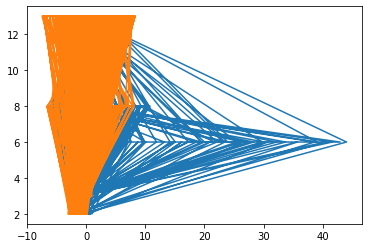

In [11]:
#plotting reduced data vs ytrain data
import matplotlib.pyplot as plt
plt.plot(pca_data, ytrain)

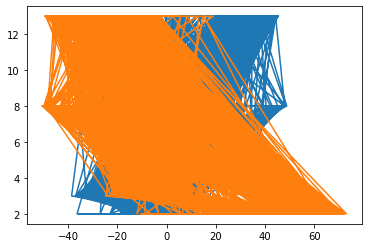

In [12]:
plt.plot(tsne_data, ytrain)

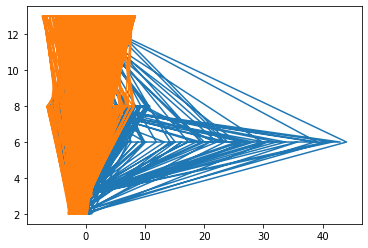

In [13]:
plt.plot(svd_data, ytrain)

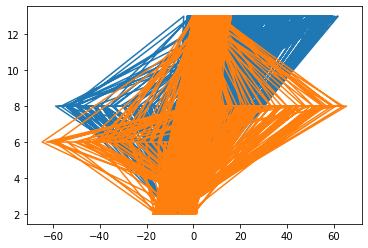

In [14]:
plt.plot(iso_data, ytrain)

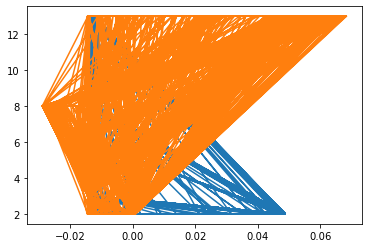

In [15]:
plt.plot(lle_data, ytrain)

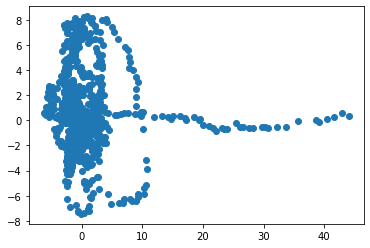

In [16]:
#plotting as scatter plots for clustering
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()

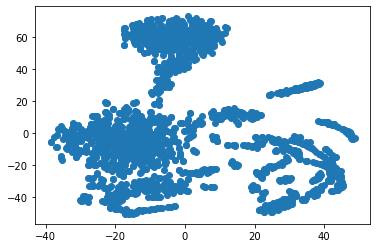

In [17]:
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

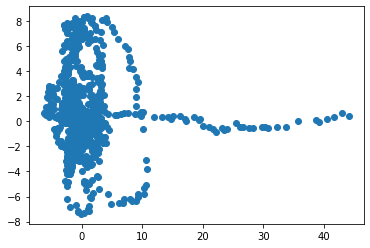

In [18]:
plt.scatter(svd_data[:,0], svd_data[:,1])
plt.show()

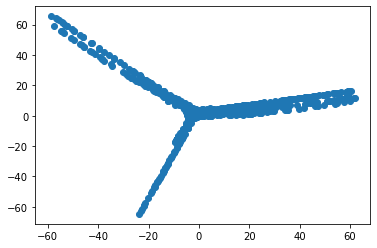

In [19]:
plt.scatter(iso_data[:,0], iso_data[:,1])
plt.show()

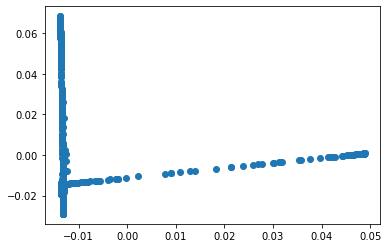

In [20]:
plt.scatter(lle_data[:,0], lle_data[:,1])
plt.show()

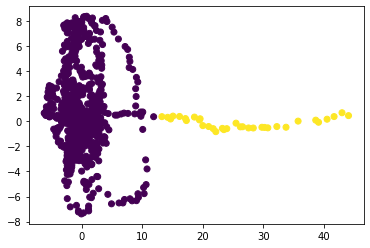

In [25]:
#Using tsne and svd data for clustering
#starting with KMeans
from sklearn.cluster import KMeans as KM
kmeans = KM(init = "k-means++", n_clusters = 2, n_init = 10).fit(svd_data)
p_svd = kmeans.predict(svd_data)
plt.scatter(svd_data[:,0], svd_data[:,1], c=p_svd)

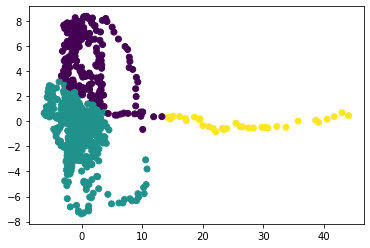

In [26]:
#Testing different number of clusters
kmeans = KM(init = "k-means++", n_clusters = 3, n_init = 10).fit(svd_data)
p_svd = kmeans.predict(svd_data)
plt.scatter(svd_data[:,0], svd_data[:,1], c=p_svd)

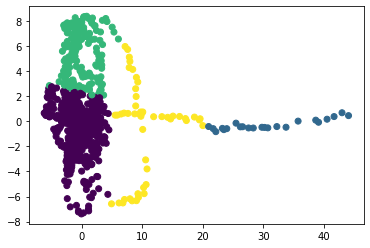

In [28]:
kmeans = KM(init = "k-means++", n_clusters = 4, n_init = 10).fit(svd_data)
p_svd = kmeans.predict(svd_data)
plt.scatter(svd_data[:,0], svd_data[:,1], c=p_svd)

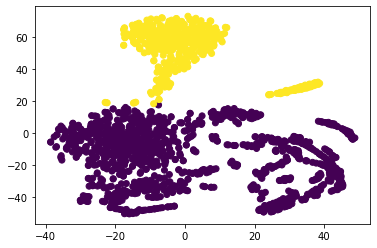

In [32]:
#Kmeans on tsne data
kmeans = KM(init = "k-means++", n_clusters = 2, n_init = 10).fit(tsne_data)
p_tsne = kmeans.predict(tsne_data)
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=p_tsne)

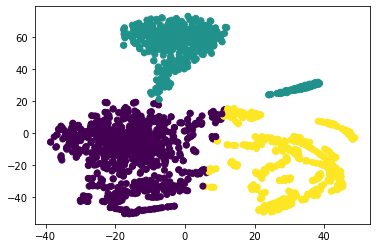

In [35]:
#Testing different cluster sizes
kmeans = KM(init = "k-means++", n_clusters = 3, n_init = 10).fit(tsne_data)
p_tsne = kmeans.predict(tsne_data)
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=p_tsne)

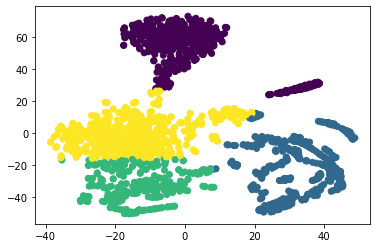

In [33]:
kmeans = KM(init = "k-means++", n_clusters = 4, n_init = 10).fit(tsne_data)
p_tsne = kmeans.predict(tsne_data)
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=p_tsne)

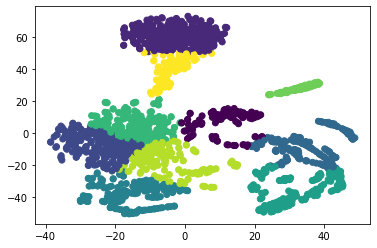

In [34]:
kmeans = KM(init = "k-means++", n_clusters = 10, n_init = 10).fit(tsne_data)
p_tsne = kmeans.predict(tsne_data)
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=p_tsne)